Mean Squared Error (MSE): 16651.214481193765
Root Mean Squared Error (RMSE): 129.03958493886194
Mean Absolute Error (MAE): 107.51669744698012
R-squared (R²) Score: 0.1578054754985695


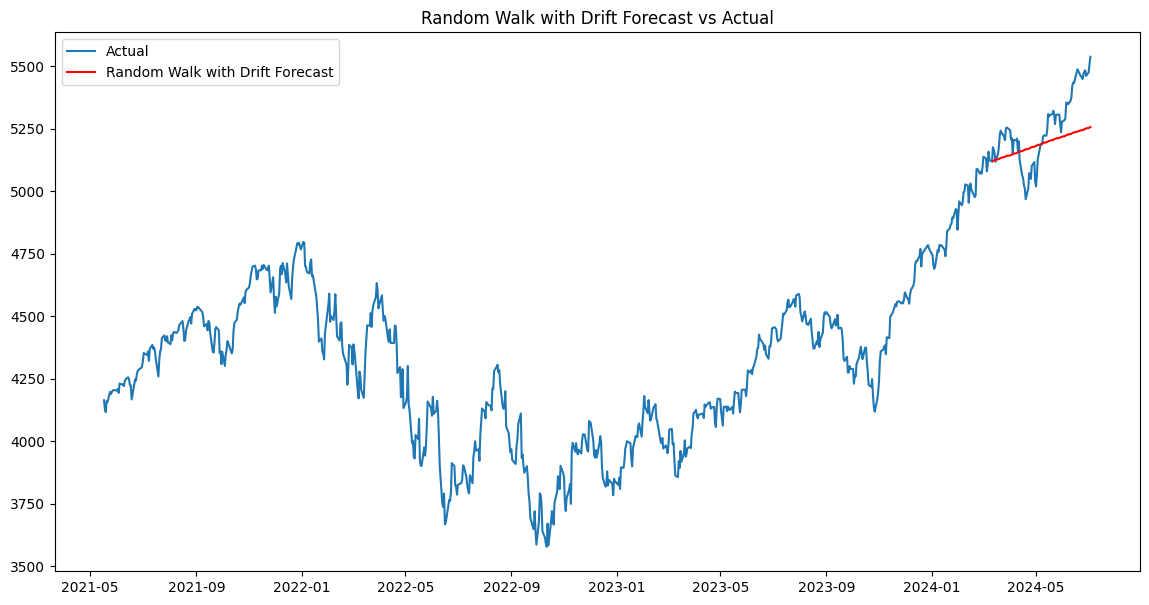

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Load the data
data = pd.read_csv('dataset.csv')

# Step 2: Prepare the data
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data.set_index('Date', inplace=True)

# We will use the 'Adj Close' column for forecasting
adj_close = data['Adj Close']

# Step 3: Fit the Random Walk with Drift model
# Calculate the drift (mean of the differences)
drift = np.mean(np.diff(adj_close))

# Create the random walk with drift forecast
random_walk_forecast = [adj_close.iloc[-1] + (i + 1) * drift for i in range(len(adj_close))]

# Convert to pandas Series
random_walk_forecast = pd.Series(random_walk_forecast, index=adj_close.index)

# Step 4: Evaluate the Forecast
# Here we compare the first part of the forecast with actual values for evaluation
# Assuming we are forecasting the last 10% of the dataset
split_index = int(0.9 * len(adj_close))
train, test = adj_close[:split_index], adj_close[split_index:]

# Forecast using the Random Walk with Drift model
random_walk_forecast_test = [train.iloc[-1] + (i + 1) * drift for i in range(len(test))]

# Convert to pandas Series
random_walk_forecast_test = pd.Series(random_walk_forecast_test, index=test.index)

# Calculate evaluation metrics
mse = mean_squared_error(test, random_walk_forecast_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, random_walk_forecast_test)
r2 = r2_score(test, random_walk_forecast_test)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R²) Score: {r2}')

# Step 5: Plot the results
plt.figure(figsize=(14, 7))
plt.plot(adj_close, label='Actual')
plt.plot(random_walk_forecast_test, label='Random Walk with Drift Forecast', color='red')
plt.title('Random Walk with Drift Forecast vs Actual')
plt.legend()
plt.show()
